In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('car data.csv')

In [44]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [46]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [47]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [48]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [49]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [50]:
df.shape

(301, 9)

In [51]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [52]:
df.duplicated().sum()

2

In [53]:
df=df.drop_duplicates(keep='first')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [55]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Transmission']= label_encoder.fit_transform(df['Transmission'])

In [56]:
df['Seller_Type']= label_encoder.fit_transform(df['Seller_Type'])

In [57]:
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])

In [65]:
X=df.iloc[:,[1,3,4,5,6,7,8]]
X.head()
Y=df.iloc[:,2]

In [67]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [68]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features = SelectKBest(score_func=chi2,k=5)
order=ordered_rank_features.fit(X,Y)

ValueError: ignored

In [70]:
df1=pd.DataFrame(order.scores_,columns=['Score'])
dfc=pd.DataFrame(X.columns)
features_rank = pd.concat([dfc,df1],axis=1)

NameError: ignored

In [75]:
df['current_year']=2023

In [76]:
df['no_of_year']=df['current_year']-df['Year']

In [77]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2023,9
1,sx4,2013,4.75,9.54,43000,1,0,1,0,2023,10
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2023,6
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,2023,12
4,swift,2014,4.60,6.87,42450,1,0,1,0,2023,9


In [79]:
df.drop(columns=['Car_Name','Year','current_year'],axis=1,inplace=True)

In [80]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


<Axes: >

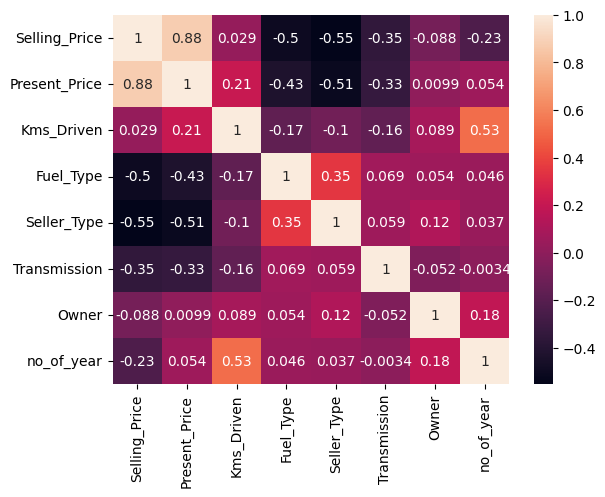

In [84]:

sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='no_of_year', ylabel='Selling_Price'>

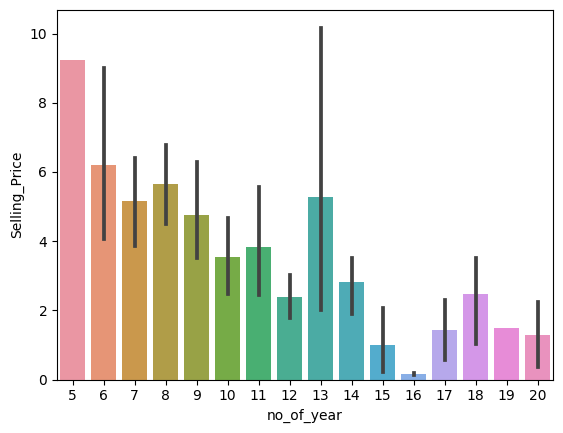

In [86]:
sns.barplot(y='Selling_Price',x='no_of_year',data=df)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Kms_Driven     299 non-null    int64  
 3   Fuel_Type      299 non-null    int64  
 4   Seller_Type    299 non-null    int64  
 5   Transmission   299 non-null    int64  
 6   Owner          299 non-null    int64  
 7   no_of_year     299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 21.0 KB


In [87]:
X=df.iloc[:,[1,2,3,4,5,6,7]]
X.head()
Y=df.iloc[:,0]

In [88]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6
3,4.15,5200,2,0,1,0,12
4,6.87,42450,1,0,1,0,9


In [89]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [92]:
print(model.feature_importances_)

[4.08240449e-01 4.00875561e-02 1.49047051e-01 2.38843940e-01
 8.20213250e-02 2.43984360e-04 8.15156951e-02]


In [93]:
rank=pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

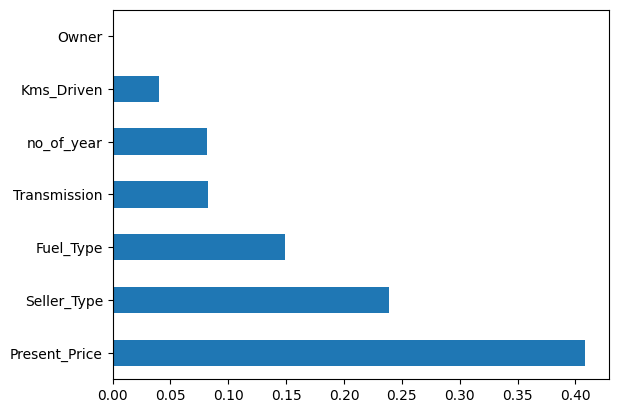

In [94]:
rank.nlargest(10).plot(kind='barh')

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [103]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [105]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_sample_split=[2,5,10,25,100]
min_sample_leaf=[1,2,5,10]

In [117]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_sample_split':min_sample_split,
             'min_sample_leaf':min_sample_leaf
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_sample_split': [2, 5, 10, 25, 100], 'min_sample_leaf': [1, 2, 5, 10]}


In [108]:
rf=RandomForestRegressor()

In [113]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
                               random_state=43,n_jobs=1)

In [114]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: ignored

In [118]:
rf_random.best_score_

AttributeError: ignored